In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

Leggo il file Excel e lo copio in lanci

In [3]:
lanci = pd.read_excel('file://localhost/Users/Lanci1.xlsx')
lanci.head()

,Lanciato,temp,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions
0,1,13.2,95.67,0.0,0.0,0.0,1019.7,0.0,2.0,0.1
1,1,13.1,95.14,0.0,6.8,274.0,1019.3,0.0,10.3,0.1
2,1,15.2,95.91,0.0,10.2,312.0,1019.6,0.0,16.0,0.1
3,1,16.0,96.49,0.0,7.6,320.0,1019.9,2.6,16.0,0.1
4,1,15.9,95.08,0.0,11.1,321.0,1019.3,0.0,16.0,0.1


Copio il file e assegno a lanci_labels le etichette

In [4]:
lanci_features=lanci.copy()
lanci_labels=lanci_features.pop('Lanciato')

In [5]:
lanci_caratt=np.array(lanci_features)
lanci_caratt

array([[ 13.2 ,  95.67,   0.  , ...,   0.  ,   2.  ,   0.1 ],
       [ 13.1 ,  95.14,   0.  , ...,   0.  ,  10.3 ,   0.1 ],
       [ 15.2 ,  95.91,   0.  , ...,   0.  ,  16.  ,   0.1 ],
       ...,
       [ 13.7 ,  86.68,   0.  , ..., 100.  ,  16.  ,   0.4 ],
       [ 13.5 ,  83.28,   0.  , ..., 100.  ,  16.  ,   0.4 ],
       [ 13.5 ,  81.15,   0.  , ...,  91.2 ,  16.  ,   0.4 ]])

In [6]:
train_dataset = lanci.sample(frac=0.8, random_state=0)
test_dataset = lanci.drop(train_dataset.index)

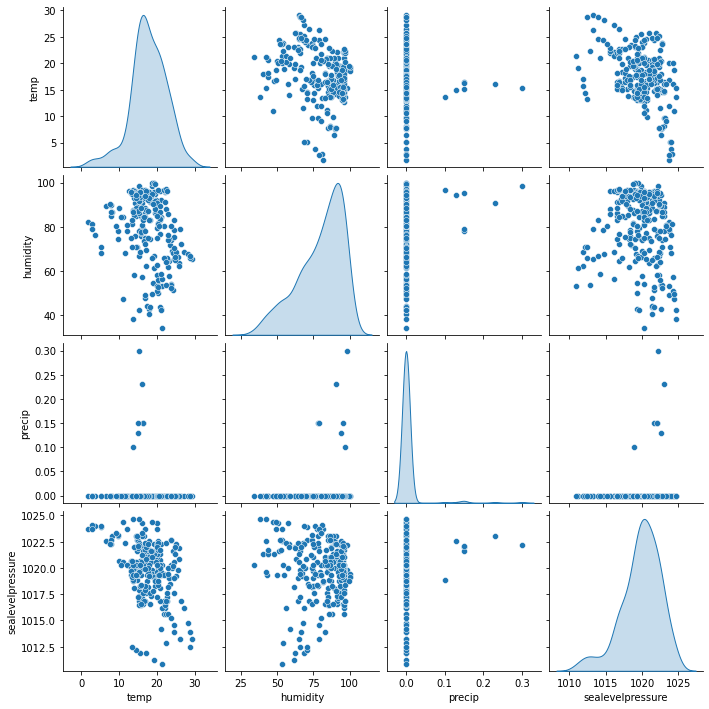

In [7]:
sns.pairplot(train_dataset[['temp', 'humidity', 'precip', 'sealevelpressure']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lanciato,250.0,1.016000,0.125727,1.00,1.000,1.00,1.0000,2.0
temp,250.0,17.671200,4.774948,1.80,15.125,17.35,20.9000,29.2
humidity,250.0,79.742080,15.439877,34.41,69.240,84.30,92.9075,100.0
precip,248.0,0.004879,0.030608,0.00,0.000,0.00,0.0000,0.3
windspeed,250.0,12.096800,6.143301,0.00,8.125,11.35,16.2000,28.6
winddir,250.0,212.739600,119.563458,0.00,140.000,220.50,322.0000,360.0
sealevelpressure,250.0,1019.810000,2.702955,1010.90,1018.325,1020.20,1021.7000,1024.7
cloudcover,250.0,24.015600,36.081626,0.00,0.000,0.00,42.5500,100.0
visibility,250.0,15.227200,2.600321,1.60,16.000,16.00,16.0000,16.0
conditions,250.0,0.181600,0.124755,0.10,0.100,0.10,0.3000,0.5


Si può notare come i dati siano abbastanza diversi gli uni dagli altri: è quindi necessario normalizzare i dati

In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [10]:
normalizer.adapt(np.array(lanci_features))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-02-28 12:35:12.466414: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
print(normalizer.mean.numpy())

[[1.7550001e+01 8.0511147e+01           nan 1.2021476e+01 2.1451859e+02
  1.0197715e+03 2.5918591e+01 1.5162501e+01 1.8750001e-01]]


Regressione lineare con una variabile

In [14]:
humidity = np.array(lanci_features['humidity'])

humidity_normalizer = layers.Normalization(input_shape=[1,], axis=None)
humidity_normalizer.adapt(humidity)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [15]:
humidity_model = tf.keras.Sequential([
    humidity_normalizer,
    layers.Dense(units=1)
])

humidity_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [16]:
humidity_model.predict(humidity[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[ 1.0084974 ],
       [ 0.9732372 ],
       [ 1.0244646 ],
       [ 1.0630509 ],
       [ 0.9692457 ],
       [ 0.9146923 ],
       [ 0.9313244 ],
       [ 0.74570954],
       [ 0.24408373],
       [-0.45978907]], dtype=float32)

Modello di apprendimento profondo

In [6]:
lanci_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

lanci_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [7]:
lanci_labels=np.array(lanci_labels)

In [8]:
lanci_model.fit(lanci_caratt, lanci_labels, epochs=10)

2022-02-28 11:36:57.368648: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-28 11:36:57.372201: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Train on 312 samples
Epoch 1/10
312/312 [==============================] - 1s 4ms/sample - loss: nan  
Epoch 2/10
312/312 [==============================] - 0s 88us/sample - loss: nan
Epoch 3/10
312/312 [==============================] - 0s 97us/sample - loss: nan
Epoch 4/10
312/312 [==============================] - 0s 95us/sample - loss: nan
Epoch 5/10
312/312 [==============================] - 0s 91us/sample - loss: nan
Epoch 6/10
312/312 [==============================] - 0s 92us/sample - loss: nan
Epoch 7/10
312/312 [==============================] - 0s 94us/sample - loss: nan
Epoch 8/10
312/312 [==============================] - 0s 96us/sample - loss: nan
Epoch 9/10
312/312 [==============================] - 0s 88us/sample - loss: nan
Epoch 10/10
312/312 [==============================] - 0s 79us/sample - loss: nan


In [9]:
lanci_model.save('test')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-02-28 11:37:03.640994: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: test/assets


In [10]:
lanci_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  65        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [11]:
print(lanci_model)

In [18]:
lanci_model.predict(lanci_caratt[1:10])

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [2]:
print(tf.__version__)

2.8.0
